In [1]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
train_file = "../data/wdbc/wdbc.csv"

df_train = pd.read_csv(train_file,index_col=0)
# df_train = df_train.drop(df_train.columns[0], axis=1)
l_train = len(df_train)
print("Length of training data: %d"%(l_train))


Length of training data: 569


In [3]:
null_check = df_train.isna().sum()
print("Null check on training data:")
print(null_check)


Null check on training data:
Diagnosis             0
RadiusMean            0
TextureMean           0
PerimeterMean         0
AreaMean              0
SmoothnesMean         0
CompactnessMean       0
ConcavityMean         0
ConcavePointsMean     0
SymmetryMean          0
FractaldimMean        0
RadiusSE              0
TextureSE             0
PerimeterSE           0
AreaSE                0
SmoothnesSE           0
CompactnessSE         0
ConcavitySE           0
ConcavePointsSE       0
SymmetrySE            0
FractaldimSE          0
RadiusWorst           0
TextureWorst          0
PerimeterWorst        0
AreaWorst             0
SmoothnesWorst        0
CompactnessWorst      0
ConcavityWorst        0
ConcavePointsWorst    0
SymmetryWorst         0
FractaldimWorst       0
dtype: int64


In [4]:
print("Original data:")
df_train.head(5)

Original data:


,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnesMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnesWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractaldimWorst
ID,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df_train.fillna(-1, inplace=True)
print("New data (after filling NaN by -1):")
df_train.head(5)

New data (after filling NaN by -1):


,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnesMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnesWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractaldimWorst
ID,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
print("Label distribution of training data:")
print((df_train.Diagnosis.value_counts()/l_train))

Label distribution of training data:
B    0.627417
M    0.372583
Name: Diagnosis, dtype: float64


In [7]:
df_train.describe()

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnesMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractaldimMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnesWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractaldimWorst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
traindev = df_train.sample(frac=1,random_state=1).reset_index(drop=True)
#train, dev, test = np.split(traindev, [int(.6*len(df)), int(.8*len(df))])
train, dev = train_test_split(traindev, test_size=0.3)
train = train.reset_index(drop=True)
dev = dev.reset_index(drop=True)

In [9]:
train.to_csv("../data/wdbc/wdbc_train.csv", index=False)
dev.to_csv("../data/wdbc/wdbc_test.csv", index=False)

In [10]:
dev.head(10)

,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnesMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnesWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractaldimWorst
0,B,12.070,13.44,77.83,445.2,0.11000,0.09009,0.03781,0.027980,0.1657,...,13.450,15.77,86.92,549.9,0.1521,0.1632,0.16220,0.07393,0.2781,0.08052
1,B,13.770,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.019170,0.1592,...,14.670,16.93,94.17,661.1,0.1170,0.1072,0.03732,0.05802,0.2823,0.06794
2,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,...,9.077,30.92,57.17,248.0,0.1256,0.0834,0.00000,0.00000,0.3058,0.09938
3,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.1297,0.1357,0.06880,0.02564,0.3105,0.07409
4,M,12.770,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.027040,0.1585,...,14.490,33.37,92.04,653.6,0.1419,0.1523,0.21770,0.09331,0.2829,0.08067
5,M,13.440,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.020310,0.1784,...,15.930,30.25,102.50,787.9,0.1094,0.2043,0.20850,0.11120,0.2994,0.07146
6,M,17.010,20.26,109.70,904.3,0.08772,0.07304,0.06950,0.053900,0.2026,...,19.800,25.05,130.00,1210.0,0.1111,0.1486,0.19320,0.10960,0.3275,0.06469
7,B,10.750,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,...,11.950,20.72,77.79,441.2,0.1076,0.1223,0.09755,0.03413,0.2300,0.06769
8,B,12.890,14.11,84.95,512.2,0.08760,0.13460,0.13740,0.039800,0.1596,...,14.390,17.70,105.00,639.1,0.1254,0.5849,0.77270,0.15610,0.2639,0.11780
9,B,11.430,17.31,73.66,398.0,0.10920,0.09486,0.02031,0.018610,0.1645,...,12.780,26.76,82.66,503.0,0.1413,0.1792,0.07708,0.06402,0.2584,0.08096


In [11]:
def pieplt(data):
    print("Print len of data: %d"%len(data))
    labels = data["Diagnosis"].value_counts()
    plt.figure(figsize=(10,10))
    labels.plot.pie(autopct='%.2f')

Print len of data: 398


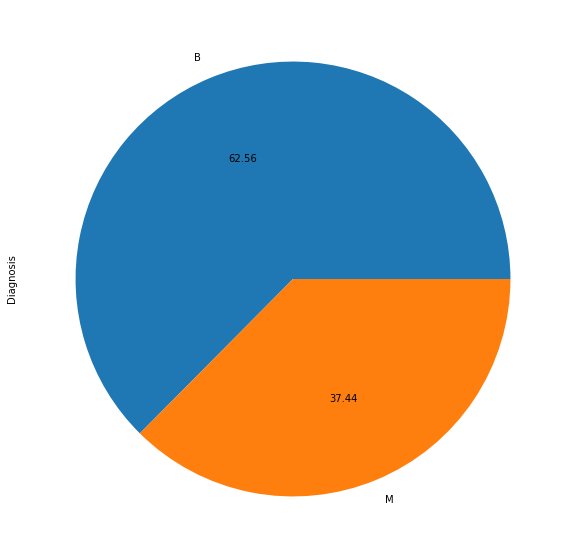

In [12]:
pieplt(train)

Print len of data: 171


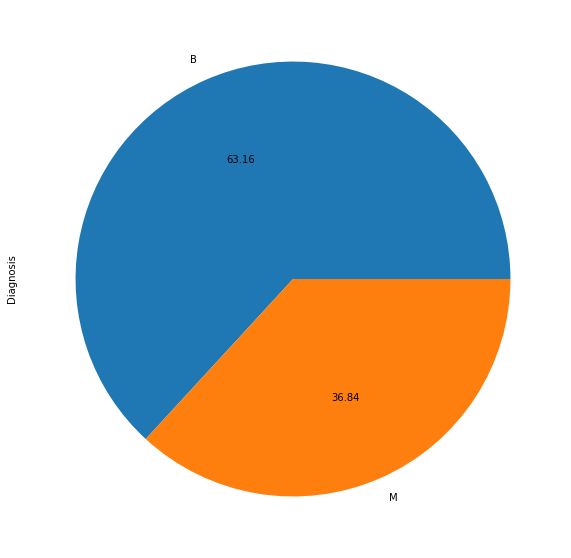

In [13]:
pieplt(dev)